<a href="https://colab.research.google.com/github/Somnadh02/Sepsis-prediction/blob/main/SEPSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/Somnadh02/Sepsis-prediction/blob/main/sepsis_Data2.csv

--2024-11-08 06:12:47--  https://github.com/Somnadh02/Sepsis-prediction/blob/main/sepsis_Data2.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘sepsis_Data2.csv’

sepsis_Data2.csv        [ <=>                ] 162.57K   916KB/s    in 0.2s    

2024-11-08 06:12:47 (916 KB/s) - ‘sepsis_Data2.csv’ saved [166468]



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/Somnadh02/Sepsis-prediction/refs/heads/main/sepsis_Data2.csv")
dataset=dataset.drop("Unnamed: 0",axis=1)
dataset.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,61.0,99.0,36.44,124.0,65.0,43.0,17.5,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,2,0
1,64.0,98.0,36.44,125.0,64.0,41.0,27.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,3,0
2,56.0,100.0,36.44,123.0,65.0,41.0,9.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,4,0
3,66.0,99.0,36.22,120.0,67.0,43.0,23.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,5,0
4,94.0,100.0,36.22,194.0,116.0,66.0,14.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,6,0


In [ ]:
from sklearn.utils import resample
df_majority = dataset[dataset.SepsisLabel==0]
df_minority = dataset[dataset.SepsisLabel==1]

In [ ]:
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=57070,
                                 random_state=123)

In [ ]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
df_upsampled.SepsisLabel.value_counts()

,count
SepsisLabel,
0,57070
1,57070


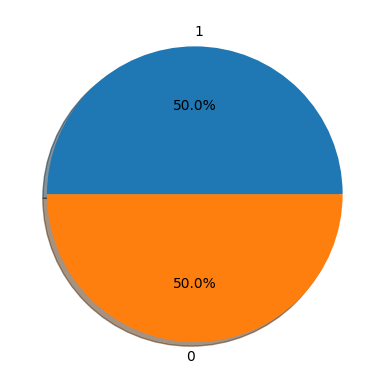

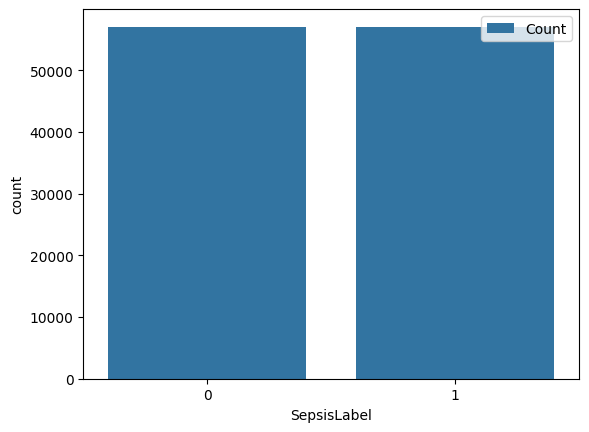

In [ ]:
plt.pie(df_upsampled['SepsisLabel'].value_counts(), labels=['1','0'], autopct='%1.1f%%', shadow=True)
plt.show()
sns.countplot(x=df_upsampled['SepsisLabel'], label="Count")
plt.show()

In [ ]:
cols = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'FiO2', 'Glucose', 'Age', 'Gender', 'Unit1', 'Unit2', 'ICULOS', 'SepsisLabel']
df = df_upsampled[cols]

In [ ]:
X = df[df.columns[0:14]].values

In [ ]:
Y = df[df.columns[14:]].values


In [ ]:
print("sepsis dimensions : {}".format(df.shape))

sepsis dimensions : (114140, 15)


In [ ]:
print("sepsis dimensions without label : {}".format(X.shape))

sepsis dimensions without label : (114140, 14)


In [ ]:
print("sepsis dimensions only label : {}".format(Y.shape))

sepsis dimensions only label : (114140, 1)


In [ ]:
labelencoder_Y = preprocessing.LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
print("Training data dimensions :{}".format(X_train.shape))
print("Testing data dimensions :{}".format(X_test.shape))

Training data dimensions :(91312, 14)
Testing data dimensions :(22828, 14)


# Code for MLP Classifier Algorithm

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neural_network import MLPClassifier

In [ ]:
clf=MLPClassifier(
    activation='tanh',
    solver='lbfgs',
    early_stopping=False,
    hidden_layer_sizes=(40,10,10,10,10, 2),
    random_state=1,
    batch_size='auto',
    max_iter=13000,
    learning_rate_init=1e-5,
    tol=1e-4,)

In [ ]:
clf.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='tanh', hidden_layer_sizes=(40, 10, 10, 10, 10, 2),
              learning_rate_init=1e-05, max_iter=13000, random_state=1,
              solver='lbfgs')

In [ ]:
import pickle


In [ ]:

filenamee = 'MLP_model.sav'
pickle.dump(clf, open(filenamee, 'wb'))

In [ ]:

loaded_model = pickle.load(open(filenamee, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.8761170492377782


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

def evaluate_model_performance(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)

    precision = precision_score(y_true, y_pred)

    recall = recall_score(y_true, y_pred)

    f1 = f1_score(y_true, y_pred)

    class_report = classification_report(y_true, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(class_report)

y_pred = loaded_model.predict(X_test)

evaluate_model_performance(Y_test, y_pred)

Accuracy: 0.8761
Precision: 0.8731
Recall: 0.8796
F1 Score: 0.8764

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     11434
           1       0.87      0.88      0.88     11394

    accuracy                           0.88     22828
   macro avg       0.88      0.88      0.88     22828
weighted avg       0.88      0.88      0.88     22828



In [ ]:

# Download the saved model file
from google.colab import files
files.download(filenamee)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay


In [ ]:
predicted = loaded_model.predict(X_test)
print(predicted.shape)
print(Y_test.shape)
print(confusion_matrix(Y_test,predicted))

(22828,)
(22828,)
[[ 9978  1456]
 [ 1372 10022]]


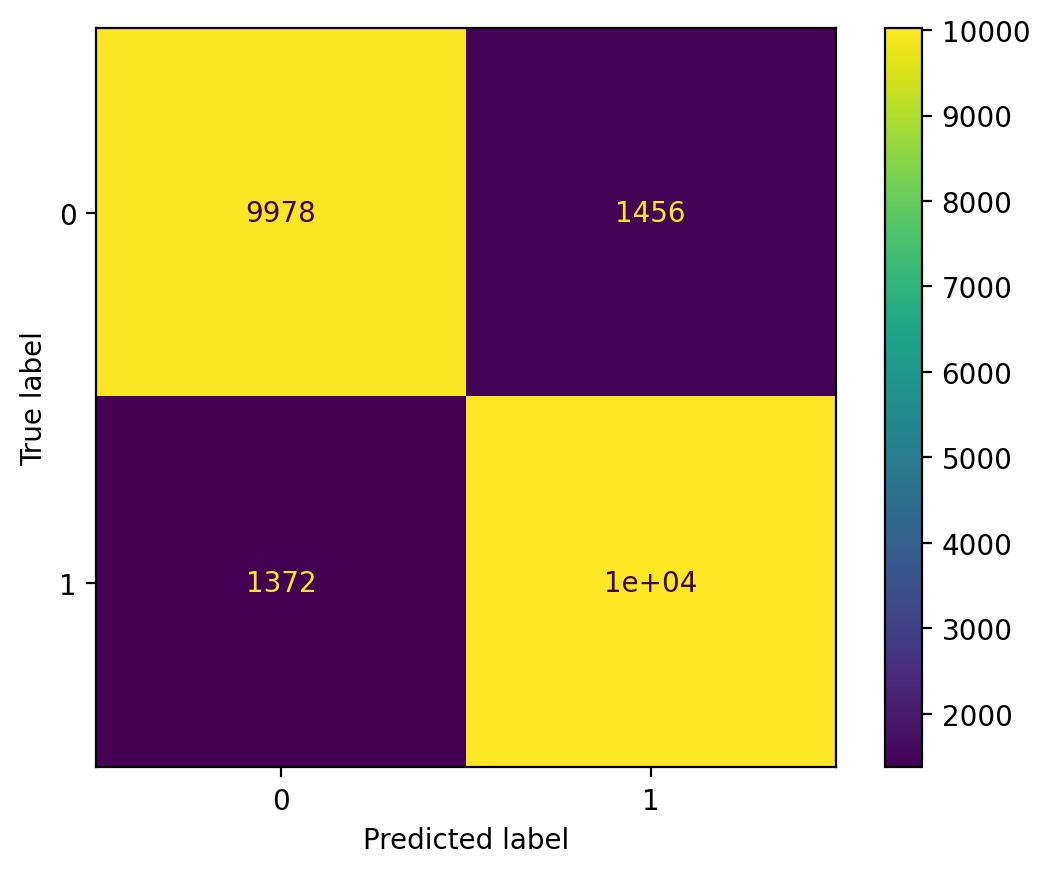

In [ ]:
cm=confusion_matrix(Y_test,predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()


In [ ]:
!wget https://raw.githubusercontent.com/Somnadh02/Sepsis-prediction/refs/heads/main/test_D.csv

--2024-11-08 09:42:33--  https://raw.githubusercontent.com/Somnadh02/Sepsis-prediction/refs/heads/main/test_D.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4777460 (4.6M) [text/plain]
Saving to: ‘test_D.csv.1’

test_D.csv.1        100%[===================>]   4.56M  --.-KB/s    in 0.1s    

2024-11-08 09:42:34 (38.0 MB/s) - ‘test_D.csv.1’ saved [4777460/4777460]



In [ ]:
df_test =pd.read_csv('test_D.csv')
df_test=df_test.drop("Unnamed: 0",axis=1)
cols = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'FiO2', 'Glucose', 'Age', 'Gender', 'Unit1', 'Unit2', 'ICULOS', 'SepsisLabel']
df = df_test[cols]

In [ ]:
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,FiO2,Glucose,Age,Gender,Unit1,Unit2,ICULOS,SepsisLabel
0,97.0,95.0,36.11,98.0,75.33,0.0,19.0,0.28,193.0,83.14,0,0.0,0.0,2,0
1,89.0,99.0,36.11,122.0,86.00,0.0,22.0,0.28,193.0,83.14,0,0.0,0.0,3,0
2,90.0,95.0,36.11,122.0,86.00,0.0,30.0,0.28,193.0,83.14,0,0.0,0.0,4,0
3,103.0,88.5,36.11,122.0,91.33,0.0,24.5,0.28,193.0,83.14,0,0.0,0.0,5,0
4,110.0,91.0,36.11,122.0,91.33,0.0,22.0,0.28,193.0,83.14,0,0.0,0.0,6,0


In [ ]:
X2_test = df[df.columns[0:14]].values


In [ ]:
Y2_test = df[df.columns[14:]].values
Y2_test
labelencoder_Y = preprocessing.LabelEncoder()
Y2_test = labelencoder_Y.fit_transform(Y2_test)
Y2_test

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("sepsis dimensions without label : {}".format(X2_test.shape))

sepsis dimensions without label : (25210, 14)


In [ ]:
print("sepsis dimensions without label : {}".format(Y2_test.shape))

sepsis dimensions without label : (25210,)


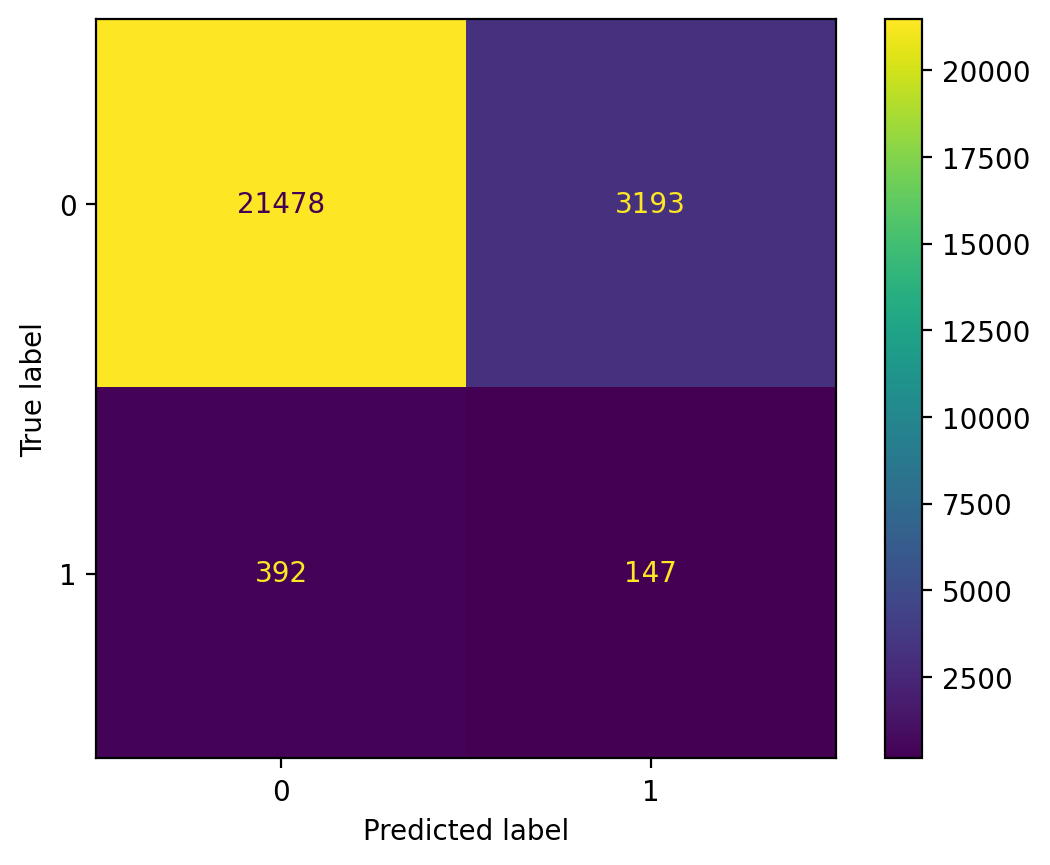

In [ ]:
loaded_model = pickle.load(open('MLP_model.sav', 'rb'))
predicted = loaded_model.predict(X2_test)
cm=confusion_matrix(Y2_test,predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=loaded_model.classes_)
disp.plot()
plt.show()

In [ ]:
result = loaded_model.score(X2_test, Y2_test)
print(result)

0.8577945259817533


In [ ]:
from sklearn.metrics import precision_score, classification_report,average_precision_score, accuracy_score, balanced_accuracy_score, precision_recall_curve, f1_score, auc, roc_curve

In [ ]:
import numpy as np
def predictors_labels_allocator(dfr):

    """
    function that allocate predictors and labels

    @param: dfr: Dataframe, complete dataframe
    @return: X: Numpy Array, predictors
             y: Numpy Array, labels
    """
    col_names = dfr.columns
    X = np.array(dfr[col_names[:-1]].values)
    y = dfr[col_names[-1]].values

    return X, y

In [ ]:
Xtr, ytr = predictors_labels_allocator(dataset)


In [ ]:
yhat_probas = loaded_model.predict_proba(X_test)


In [ ]:
def plot_ROC(y_test, y_score, n_classes=2):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr['positive'], tpr['positive'], _ = roc_curve(y_test, y_score)
    roc_auc['positive'] = auc(fpr['positive'], tpr['positive'])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    lw = 2
    plt.plot(fpr['positive'], tpr['positive'], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['positive'])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
Y_test

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
X_test

array([[ 99.  ,  94.  ,  37.56, ...,   0.  ,   0.  ,  20.  ],
       [ 68.  , 100.  ,  35.94, ...,   0.  ,   0.  ,  14.  ],
       [ 62.  ,  96.  ,  35.39, ...,   0.  ,   0.  ,  28.  ],
       ...,
       [ 86.  ,  97.  ,  36.89, ...,   1.  ,   0.  ,   3.  ],
       [ 96.  , 100.  ,  36.67, ...,   0.  ,   0.  , 192.  ],
       [107.  ,  96.  ,  38.11, ...,   0.  ,   0.  ,  55.  ]])

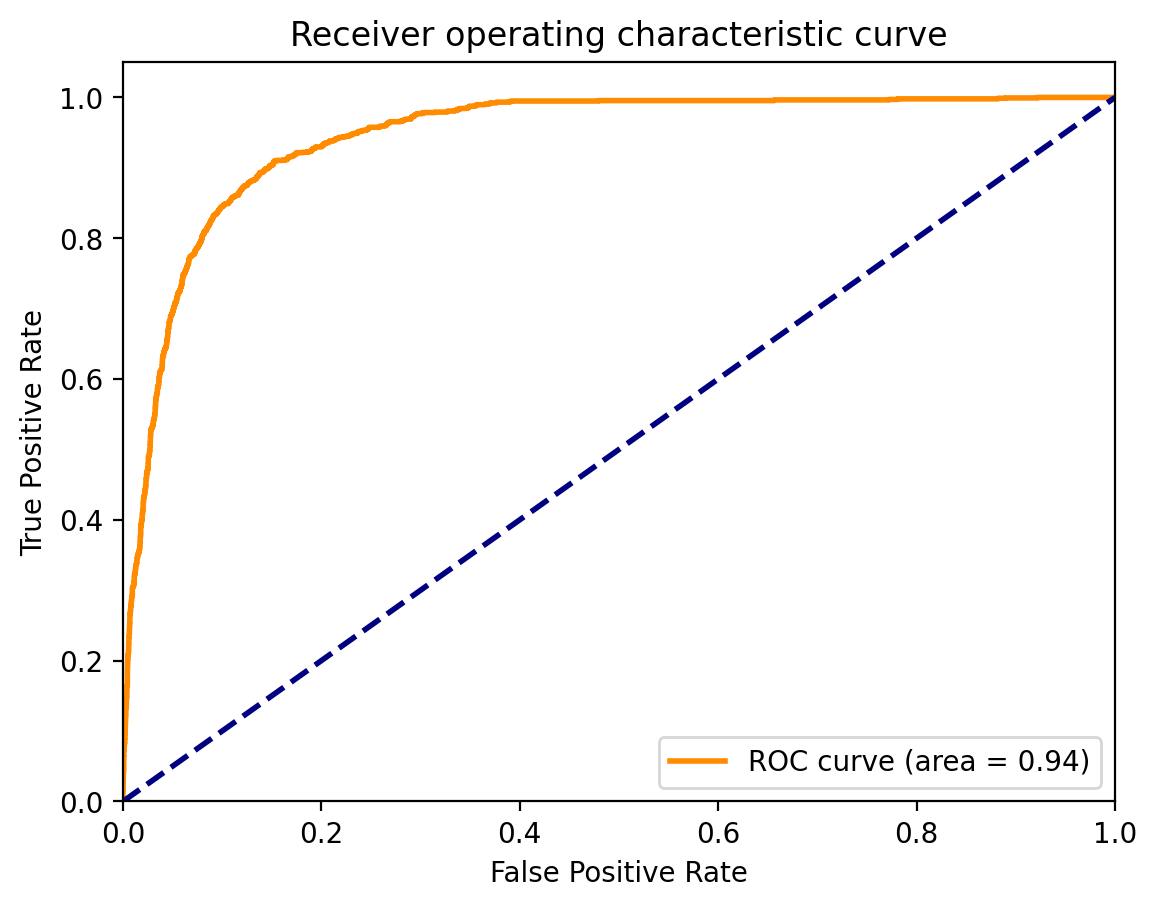

In [ ]:
plot_ROC(Y_test,yhat_probas[:,1])

# Code for XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import pickle
import matplotlib.pyplot as plt

In [ ]:

xgb_clf = xgb.XGBClassifier(
    n_estimators=1000,
    max_depth=6,
    learning_rate=1e-2,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=1,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [ ]:

xgb_clf.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:03:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
import pickle
from IPython.display import FileLink
filenam = 'XGboost_model.sav'
pickle.dump(xgb_clf, open(filenam, 'wb'))
files.download(filenam)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

loaded_modeli = pickle.load(open(filenam, 'rb'))
result = loaded_modeli.score(X_test, Y_test)
print(result)

0.9770895391624321


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

def evaluate_model_performance(y_true, y_pred):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Precision
    precision = precision_score(y_true, y_pred)

    # Recall
    recall = recall_score(y_true, y_pred)

    # F1 Score
    f1 = f1_score(y_true, y_pred)

    class_report = classification_report(y_true, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(class_report)

y_pred = loaded_modeli.predict(X_test)

evaluate_model_performance(Y_test, y_pred)

Accuracy: 0.9771
Precision: 0.9655
Recall: 0.9895
F1 Score: 0.9773

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     11434
           1       0.97      0.99      0.98     11394

    accuracy                           0.98     22828
   macro avg       0.98      0.98      0.98     22828
weighted avg       0.98      0.98      0.98     22828



In [ ]:
df_testi =pd.read_csv('test_D.csv')
df_testi=df_testi.drop("Unnamed: 0",axis=1)
cols = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'FiO2', 'Glucose', 'Age', 'Gender', 'Unit1', 'Unit2', 'ICULOS', 'SepsisLabel']
dfi = df_testi[cols]

In [ ]:
dfi.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,FiO2,Glucose,Age,Gender,Unit1,Unit2,ICULOS,SepsisLabel
0,97.0,95.0,36.11,98.0,75.33,0.0,19.0,0.28,193.0,83.14,0,0.0,0.0,2,0
1,89.0,99.0,36.11,122.0,86.00,0.0,22.0,0.28,193.0,83.14,0,0.0,0.0,3,0
2,90.0,95.0,36.11,122.0,86.00,0.0,30.0,0.28,193.0,83.14,0,0.0,0.0,4,0
3,103.0,88.5,36.11,122.0,91.33,0.0,24.5,0.28,193.0,83.14,0,0.0,0.0,5,0
4,110.0,91.0,36.11,122.0,91.33,0.0,22.0,0.28,193.0,83.14,0,0.0,0.0,6,0


In [ ]:
X2_testi = dfi[dfi.columns[0:14]].values


In [ ]:
Y2_testi = dfi[dfi.columns[14:]].values
Y2_testi
labelencoder_Y = preprocessing.LabelEncoder()
Y2_testi = labelencoder_Y.fit_transform(Y2_testi)
Y2_testi

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("sepsis dimensions without label : {}".format(X2_testi.shape))

sepsis dimensions without label : (25210, 14)


In [ ]:
print("sepsis dimensions without label : {}".format(Y2_testi.shape))

sepsis dimensions without label : (25210,)


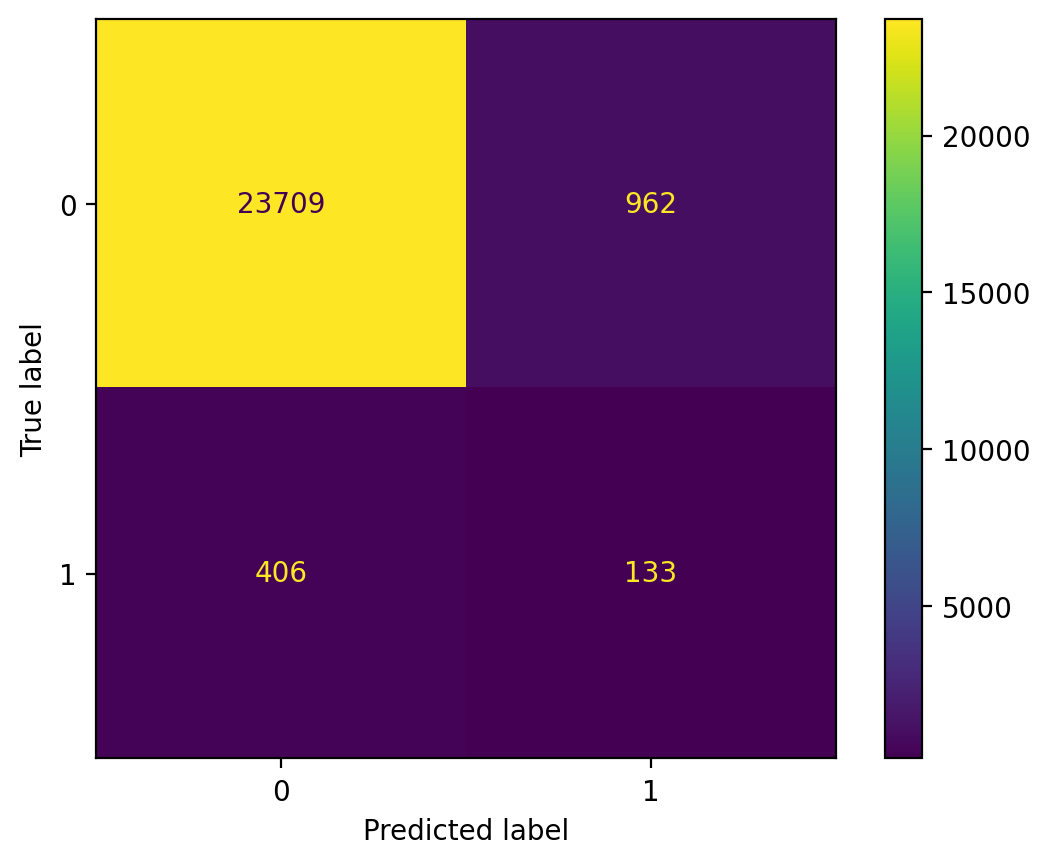

In [ ]:
loaded_modeli = pickle.load(open('XGboost_model.sav', 'rb'))
predicted = loaded_modeli.predict(X2_testi)
cm=confusion_matrix(Y2_testi,predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=loaded_modeli.classes_)
disp.plot()
plt.show()

In [ ]:
result = loaded_modeli.score(X2_testi, Y2_testi)
print(result)

0.9457358191193971


In [ ]:
from sklearn.metrics import precision_score, classification_report,average_precision_score, accuracy_score, balanced_accuracy_score, precision_recall_curve, f1_score, auc, roc_curve

In [ ]:
import numpy as np
def predictors_labels_allocator(dfr):

    """
    function that allocate predictors and labels

    @param: dfr: Dataframe, complete dataframe
    @return: X: Numpy Array, predictors
             y: Numpy Array, labels
    """
    col_names = dfr.columns
    X = np.array(dfr[col_names[:-1]].values)
    y = dfr[col_names[-1]].values

    return X, y

In [ ]:
Xt, yt = predictors_labels_allocator(dataset)


In [ ]:
yhat_probas = loaded_modeli.predict_proba(X2_testi)


In [ ]:
def plot_ROC(y_test, y_score, n_classes=2):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr['positive'], tpr['positive'], _ = roc_curve(y_test, y_score)
    roc_auc['positive'] = auc(fpr['positive'], tpr['positive'])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    lw = 2
    plt.plot(fpr['positive'], tpr['positive'], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['positive'])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
Y2_testi

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X2_testi

array([[ 97.  ,  95.  ,  36.11, ...,   0.  ,   0.  ,   2.  ],
       [ 89.  ,  99.  ,  36.11, ...,   0.  ,   0.  ,   3.  ],
       [ 90.  ,  95.  ,  36.11, ...,   0.  ,   0.  ,   4.  ],
       ...,
       [118.  ,  94.  ,  35.56, ...,   1.  ,   0.  ,  16.  ],
       [104.  ,  94.  ,  35.56, ...,   1.  ,   0.  ,  17.  ],
       [112.  ,  93.  ,  35.56, ...,   1.  ,   0.  ,  18.  ]])

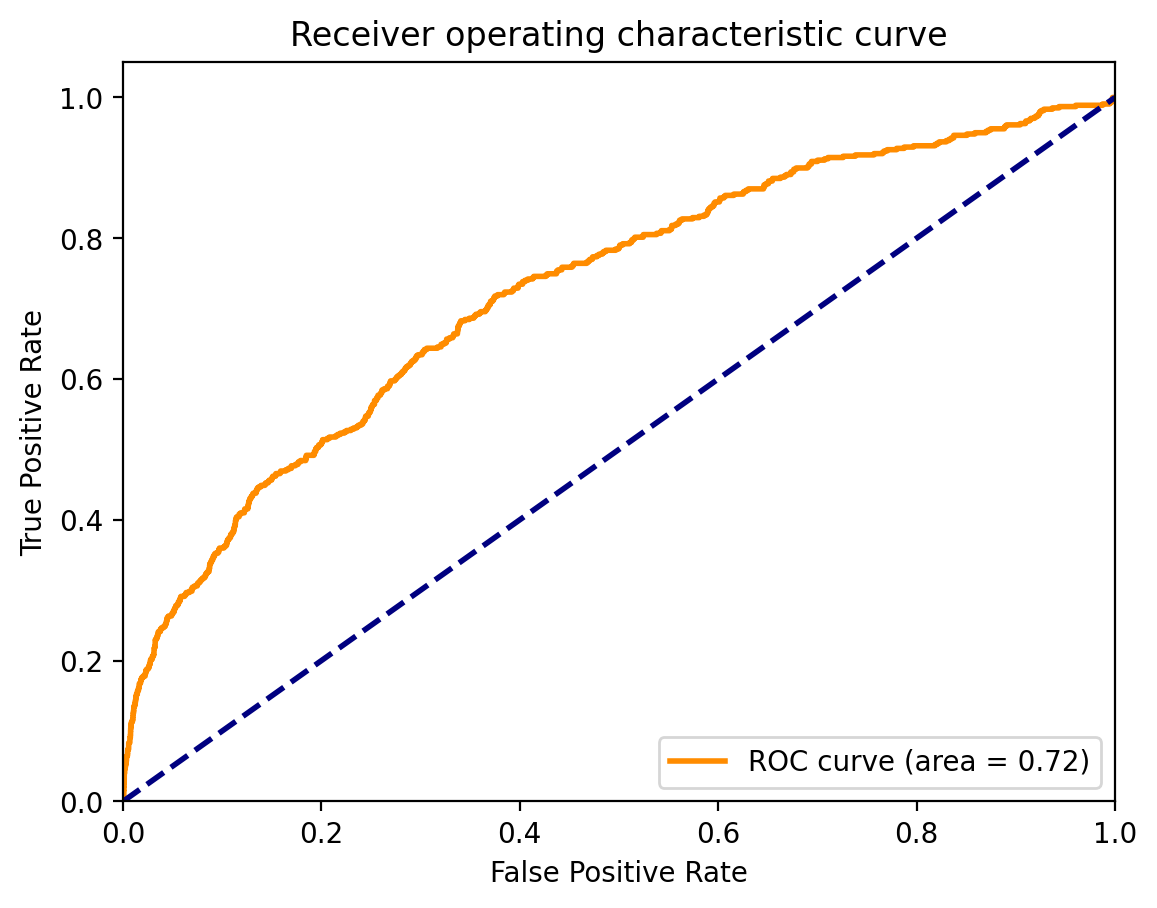

In [ ]:
plot_ROC(Y2_testi,yhat_probas[:,1])

# Code for Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=1,
    class_weight="balanced"
)

rf_clf.fit(X_train, Y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=1)

In [ ]:

filename_rf = 'RandomForest_model.sav'
pickle.dump(rf_clf, open(filename_rf, 'wb'))

In [ ]:
files.download(filename_rf)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

loaded_rf_model = pickle.load(open(filename_rf, 'rb'))

result_rf = loaded_rf_model.score(X_test, Y_test)
print(f"Accuracy on test set: {result_rf}")


Accuracy on test set: 0.9356930085859471


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

def evaluate_model_performance(y_true, y_pred):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Precision
    precision = precision_score(y_true, y_pred)

    # Recall
    recall = recall_score(y_true, y_pred)

    # F1 Score
    f1 = f1_score(y_true, y_pred)

    class_report = classification_report(y_true, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(class_report)

y_pred = loaded_rf_model.predict(X_test)

evaluate_model_performance(Y_test, y_pred)



Accuracy: 0.9357
Precision: 0.9491
Recall: 0.9206
F1 Score: 0.9346

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     11434
           1       0.95      0.92      0.93     11394

    accuracy                           0.94     22828
   macro avg       0.94      0.94      0.94     22828
weighted avg       0.94      0.94      0.94     22828



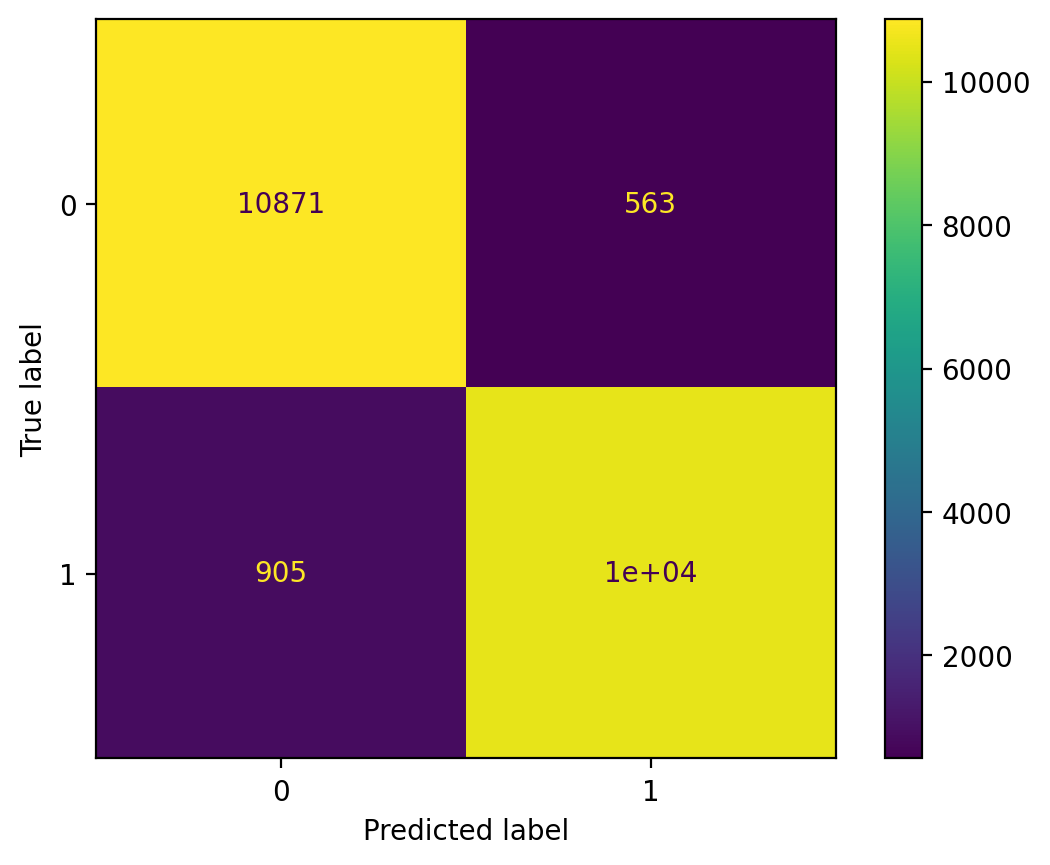

In [ ]:

predicted_rf = loaded_rf_model.predict(X_test)

cm_rf = confusion_matrix(Y_test, predicted_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=loaded_rf_model.classes_)
disp_rf.plot()
plt.show()

--2024-11-08 13:43:53--  https://raw.githubusercontent.com/Somnadh02/Sepsis-prediction/refs/heads/main/test_D.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4777460 (4.6M) [text/plain]
Saving to: ‘test_D.csv.2’

test_D.csv.2        100%[===================>]   4.56M  --.-KB/s    in 0.1s    

2024-11-08 13:43:54 (42.8 MB/s) - ‘test_D.csv.2’ saved [4777460/4777460]



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


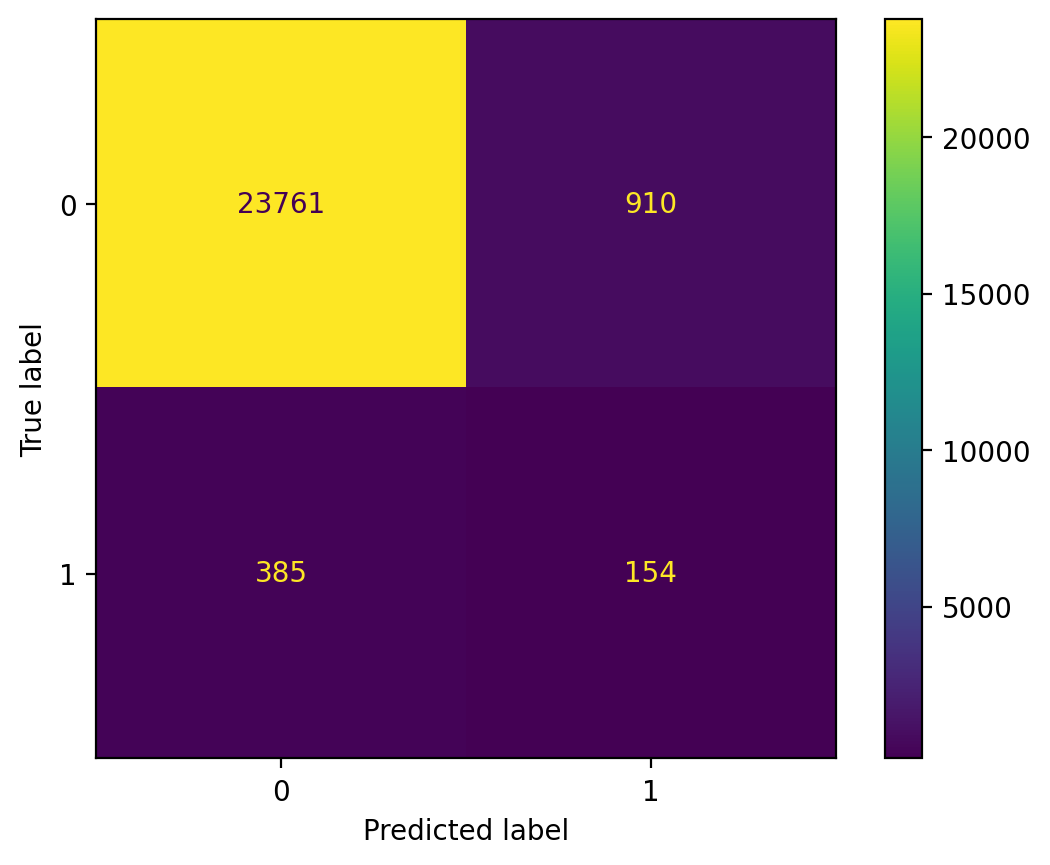

In [ ]:

import pandas as pd
from sklearn import preprocessing

!wget https://raw.githubusercontent.com/Somnadh02/Sepsis-prediction/refs/heads/main/test_D.csv
df_test = pd.read_csv('test_D.csv')
df_test = df_test.drop("Unnamed: 0", axis=1)

cols = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'FiO2', 'Glucose', 'Age', 'Gender', 'Unit1', 'Unit2', 'ICULOS', 'SepsisLabel']
df = df_test[cols]

X2_test = df[df.columns[0:14]].values
Y2_test = df[df.columns[14:]].values

labelencoder_Y = preprocessing.LabelEncoder()
Y2_test = labelencoder_Y.fit_transform(Y2_test)

predicted_sepsis = loaded_rf_model.predict(X2_test)

cm_sepsis = confusion_matrix(Y2_test, predicted_sepsis)
disp_sepsis = ConfusionMatrixDisplay(confusion_matrix=cm_sepsis, display_labels=loaded_rf_model.classes_)
disp_sepsis.plot()
plt.show()

In [ ]:
# Evaluate accuracy
result_sepsis = loaded_rf_model.score(X2_test, Y2_test)
print(f"Accuracy on Sepsis dataset: {result_sepsis}")

Accuracy on Sepsis dataset: 0.9486314954383182


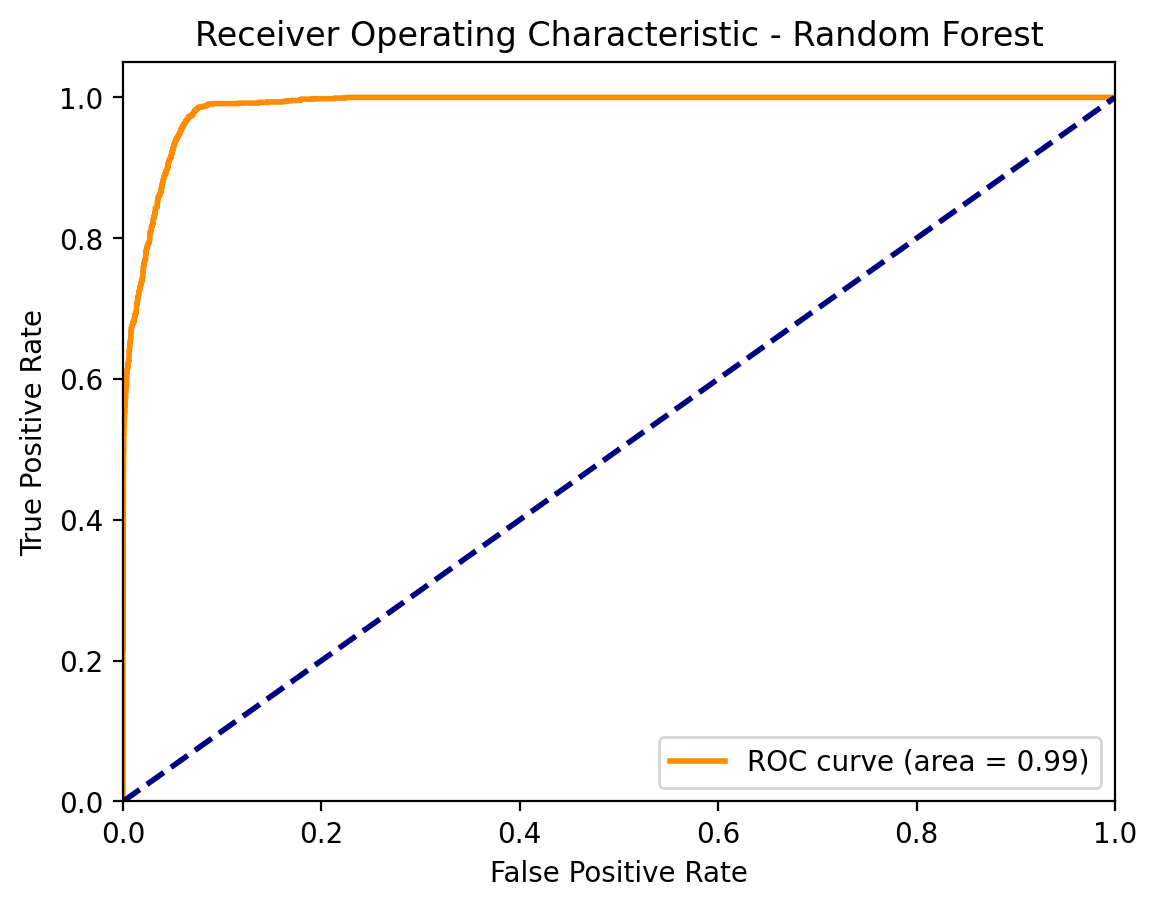

In [ ]:

yhat_probas_rf = loaded_rf_model.predict_proba(X_test)

def plot_ROC_rf(y_test, y_score):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Random Forest')
    plt.legend(loc="lower right")
    plt.show()

plot_ROC_rf(Y_test, yhat_probas_rf[:, 1])

# Code for Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

clf_logreg = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    random_state=1,
    verbose=1
)

In [ ]:

clf_logreg.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=1, verbose=1)

In [ ]:

filename_logreg = 'logistic_regression_model.sav'
pickle.dump(clf_logreg, open(filename_logreg, 'wb'))

Accuracy on X_test: 0.7297616961626073
(22828,)
(22828,)


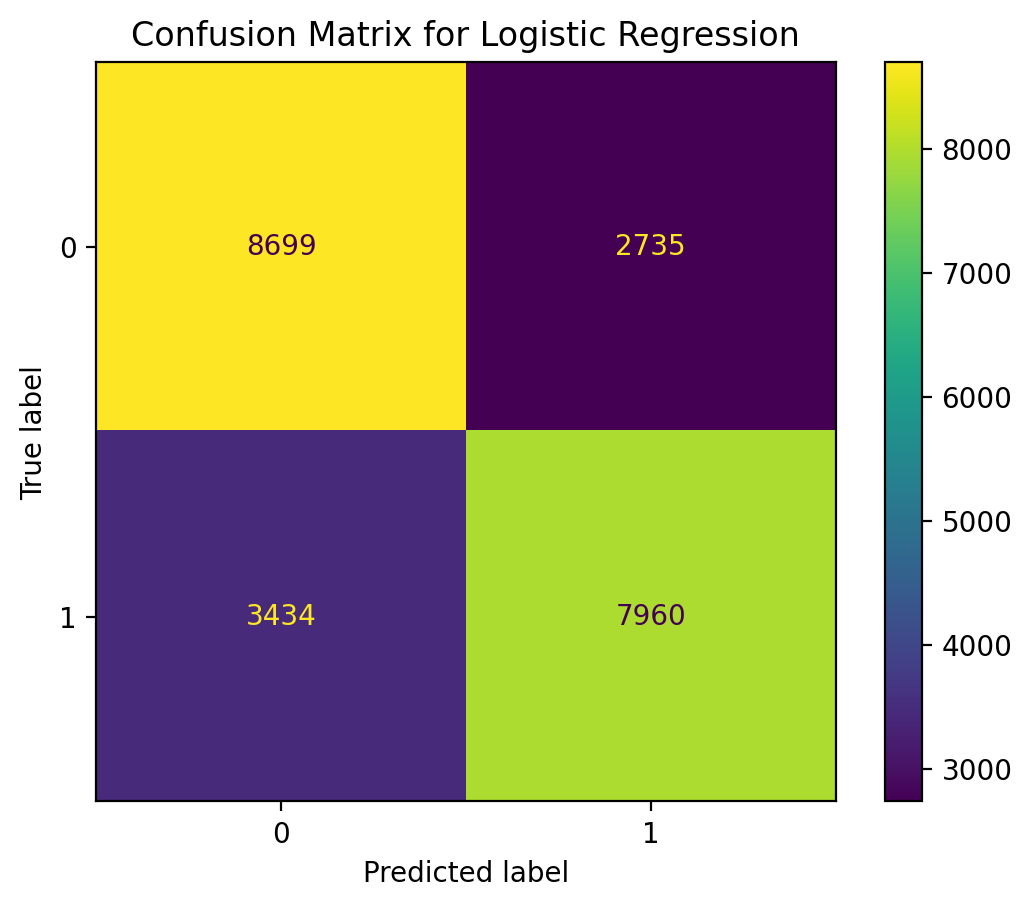

In [ ]:

loaded_model_logreg = pickle.load(open(filename_logreg, 'rb'))

result = loaded_model_logreg.score(X_test, Y_test)
print(f"Accuracy on X_test: {result}")

predicted = loaded_model_logreg.predict(X_test)
print(predicted.shape)
print(Y_test.shape)

cm = confusion_matrix(Y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=loaded_model_logreg.classes_)
disp.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

def evaluate_model_performance(y_true, y_pred):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Precision
    precision = precision_score(y_true, y_pred)

    # Recall
    recall = recall_score(y_true, y_pred)

    # F1 Score
    f1 = f1_score(y_true, y_pred)

    class_report = classification_report(y_true, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(class_report)

y_pred = loaded_model_logreg .predict(X_test)

evaluate_model_performance(Y_test, y_pred)


Accuracy: 0.7298
Precision: 0.7443
Recall: 0.6986
F1 Score: 0.7207

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74     11434
           1       0.74      0.70      0.72     11394

    accuracy                           0.73     22828
   macro avg       0.73      0.73      0.73     22828
weighted avg       0.73      0.73      0.73     22828



In [ ]:
from google.colab import files
files.download(filename_logreg)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


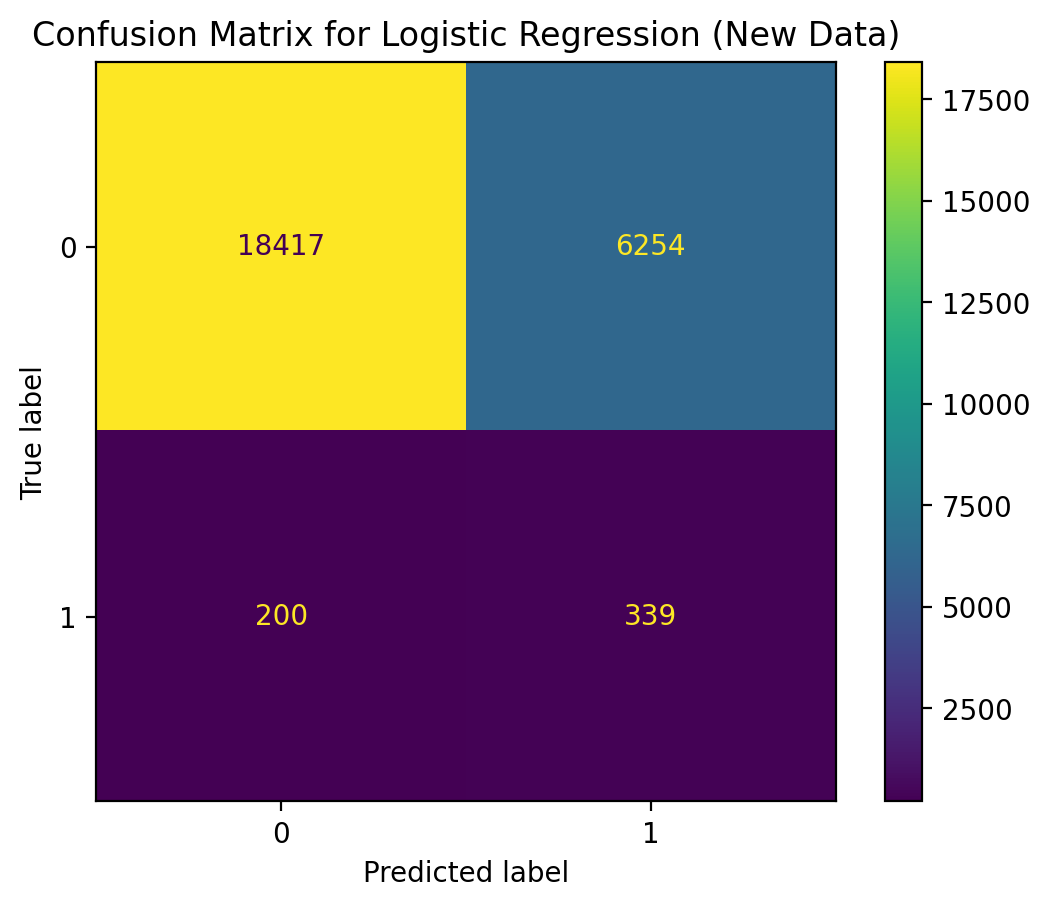

Accuracy on X2_test: 0.7439904799682666


In [ ]:
df_test = pd.read_csv('test_D.csv').drop("Unnamed: 0", axis=1)
cols = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'FiO2', 'Glucose', 'Age', 'Gender', 'Unit1', 'Unit2', 'ICULOS', 'SepsisLabel']
df = df_test[cols]

X2_test = df[df.columns[0:14]].values
Y2_test = df[df.columns[14:]].values
labelencoder_Y = LabelEncoder()
Y2_test = labelencoder_Y.fit_transform(Y2_test)

loaded_model_logreg = pickle.load(open(filename_logreg, 'rb'))
predicted = loaded_model_logreg.predict(X2_test)

cm = confusion_matrix(Y2_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=loaded_model_logreg.classes_)
disp.plot()
plt.title('Confusion Matrix for Logistic Regression (New Data)')
plt.show()

result = loaded_model_logreg.score(X2_test, Y2_test)
print(f"Accuracy on X2_test: {result}")


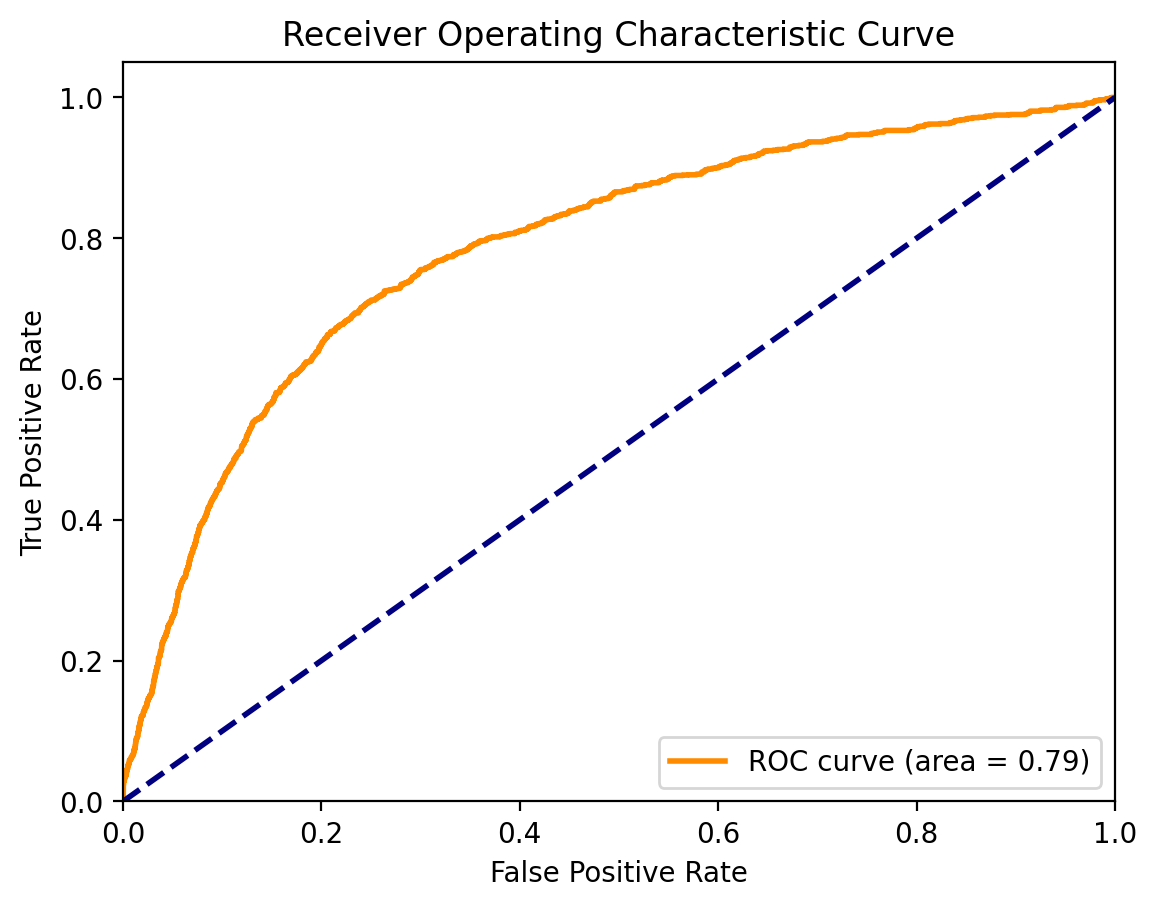

In [ ]:

yhat_probas = loaded_model_logreg.predict_proba(X_test)

def plot_ROC(y_test, y_score):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_ROC(Y_test, yhat_probas[:, 1])

# New Section

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = [loaded_model, loaded_modeli, loaded_rf_model, loaded_model_logreg]
model_names = ["MLP", "XGboost", "Randomforest", "Logistic Regression"]


results = []

for model_name, model in zip(model_names, models):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted') # 'weighted' for multi-class
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

df_scores = pd.DataFrame(results).set_index("Model")

print(df_scores)


                     Accuracy  Precision    Recall  F1 Score
Model                                                       
MLP                  0.876117   0.876139  0.876117  0.876116
XGboost              0.977090   0.977384  0.977090  0.977087
Randomforest         0.935693   0.936081  0.935693  0.935677
Logistic Regression  0.729762   0.730598  0.729762  0.729494


# Hybrid model

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

xgb_probs = xgb_clf.predict_proba(X_test)[:, 1]
rf_probs = rf_clf.predict_proba(X_test)[:, 1]

X_meta_train = np.column_stack((xgb_clf.predict_proba(X_train)[:, 1],
                                rf_clf.predict_proba(X_train)[:, 1]))
X_meta_test = np.column_stack((xgb_probs, rf_probs))


meta_mode = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
meta_mode.fit(X_meta_train, Y_train)

meta_preds = meta_mode.predict(X_meta_test)
meta_accuracy = accuracy_score(Y_test, meta_preds)
meta_roc_auc = roc_auc_score(Y_test, meta_mode.predict_proba(X_meta_test)[:, 1])

print(f"Stacked Model Accuracy: {meta_accuracy}")
print(f"Stacked Model AUC: {meta_roc_auc}")

Stacked Model Accuracy: 0.9845803399334151
Stacked Model AUC: 0.9968119880199261


In [ ]:
file_meta = 'hybri.sav'
pickle.dump(meta_mode, open(file_meta, 'wb'))
files.download(file_meta)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>